<a href="https://colab.research.google.com/github/abnermassimo1/Metodos-Numericos/blob/main/Chevi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el análisis numérico, los nodos de Chebyshev son números algebraicos reales específicos, es decir, las raíces de los polinomios de Chebyshev de primera especie. A menudo se utilizan como nodos en la interpolación polinomial porque el polinomio de interpolación resultante minimiza el efecto del fenómeno de Runge.

Los ganglios Chebyshev son importantes en la teoría de la aproximación porque forman un conjunto particularmente bueno de nodos para la interpolación polinomio. Dada la función f en el intervalo [-1,+1] y n puntos x_{1},x_{2},ldotsx_{n}, en ese intervalo, el polinomio de interpolación es ese polinomio único P_{n-1} de grado en la mayoría n-1 que tiene valor f(x_{i}) en cada punto x_{i}. El error de interpolación en x es

Este producto es un polinomio mónico de grado n. Se puede demostrar que el valor absoluto máximo (norma máxima) de cualquier polinomio está acotado desde abajo por 21−n. Este límite se logra mediante los polinomios de Chebyshev escalados 21−n Tn , que también son mónicos. (Recuerde que |Tn(x)| ≤ 1 para x ∈ [−1, 1].) Por lo tanto, cuando los nodos de interpolación x i son las raíces de Tn , el error satisface


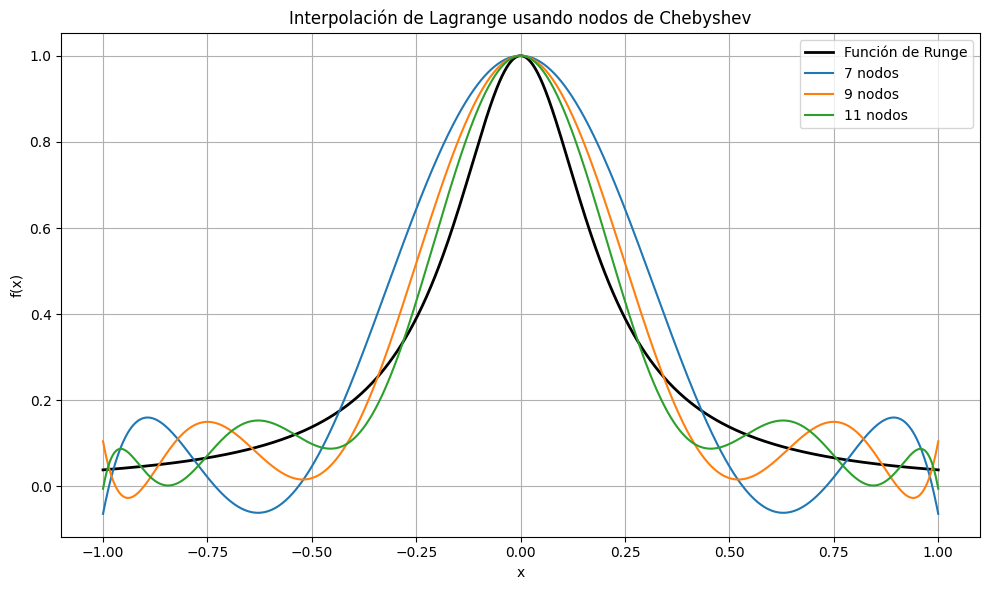

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
# Definimos la función de Runge: f(x) = 1 / (1 + 25x^2)
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Función para calcular los nodos de Chebyshev en el intervalo [a, b]
def chebyshev_nodes(n, a, b):
    # Índices desde 1 hasta n
    k = np.arange(1, n + 1)

    # Nodos de Chebyshev en [-1, 1]
    x_cheb = np.cos((2 * k - 1) * np.pi / (2 * n))

    # Transformamos los nodos desde [-1, 1] al intervalo [a, b]
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb

# Creamos una malla de puntos para evaluar y graficar la función
x_vals = np.linspace(-1, 1, 1000)    # 1000 puntos equiespaciados en [-1, 1]
f_vals = runge_function(x_vals)     # Evaluamos la función de Runge en esos puntos

# Lista con la cantidad de nodos que queremos usar para interpolar
nodos_list = [7, 9, 11]

# Iniciamos una figura para graficar
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Graficamos la función original de Runge en negro
plt.plot(x_vals, f_vals, label="Función de Runge", color='black', linewidth=2)

# Iteramos sobre la cantidad de nodos deseada (7, 9 y 11)
for n in nodos_list:
    # Calculamos los nodos de Chebyshev en [-1, 1]
    x_cheb = chebyshev_nodes(n, -1, 1)

    # Evaluamos la función de Runge en esos nodos
    y_cheb = runge_function(x_cheb)

    # Construimos el polinomio interpolante de Lagrange con esos nodos
    poly = lagrange(x_cheb, y_cheb)

    # Evaluamos el polinomio en la malla de puntos para graficarlo
    y_interp = poly(x_vals)

    # Graficamos la interpolación con n nodos
    plt.plot(x_vals, y_interp, label=f'{n} nodos')

# Añadimos título, etiquetas y leyenda al gráfico
plt.title("Interpolación de Lagrange usando nodos de Chebyshev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()       # Muestra las etiquetas de cada curva
plt.grid(True)     # Activa la cuadrícula
plt.tight_layout() # Ajusta el diseño automáticamente

# Mostramos el gráfico en pantalla
plt.show()
